In [ ]:
# Regression & Its Evaluation | Assignment

#Q1  What is Simple Linear Regression?
Simple Linear Regression is a statistical method used to study the relationship between two variables:

Independent variable (X) → the input, predictor, or cause
Dependent variable (Y) → the output, response, or effect

 Y=a+bX

Y = what we want to predict (dependent variable)
X = the input (independent variable)
a = starting value (intercept)
b = slope (how much Y changes when X increases by 1)

Example:

X = Hours studied
Y = Exam score
If the equation is:
Score =30+5×Hours
Score=30+5×Hours

➡ If a student studies 2 hours:

Score=30+5(2)=40
Score=30+5(2)=40

➡ If they study 5 hours:

Score=30+5(5)=55
Score=30+5(5)=55

In [ ]:
# Question 2: What are the key assumptions of Simple Linear Regression?
When we use Simple Linear Regression (SLR), we make some assumptions (rules we expect the data to follow). These are important because if the
rules are broken, the results may not be reliable.

 Key Assumptions of SLR

1.Linearity
The relationship between X and Y is a straight line.
Example: If study hours increase, exam scores increase in a straight-line pattern.

2.Independence
Each data point is independent of the others.
Example: One student’s score does not depend on another student’s score.

3.Homoscedasticity (Equal Spread)
The errors (differences between predicted and actual values) should have constant variance across all X values.
Example: The prediction errors for students who study 2 hours should be similar to those who study 10 hours.

5.Normality of Errors
The errors (residuals) should follow a normal distribution (bell curve).
This helps with making accurate predictions and confidence intervals.

6.No (or little) Multicollinearity → (for multiple regression, not simple)

In Simple Linear Regression we only have one X, so this isn’t an issue.
But in multiple regression, independent variables shouldn’t be too closely related.

In [ ]:
# Question 3: What is heteroscedasticity, and why is it important to address in regression models?
What is Heteroscedasticity?
In regression, we look at the errors (residuals) → the difference between the actual value and the predicted value.
Homoscedasticity = errors have equal spread (good).
Heteroscedasticity = errors have unequal spread (bad).
In simple words:
Heteroscedasticity happens when the errors get bigger or smaller as X changes.
 Example
Imagine we are predicting income based on years of experience:
For people with low experience, prediction errors are small.
For people with high experience, prediction errors are huge (spread out).
This uneven spread = heteroscedasticity.

Why is it important?
Because heteroscedasticity can cause problems:
Unreliable predictions → model might not be accurate.
Wrong conclusions → it can make statistical tests (like t-tests) less trustworthy.
Bias in confidence intervals → intervals might be too wide or too narrow.

In [ ]:
#Question 4: What is Multiple Linear Regression?

Multiple Linear Regression (MLR)

It’s just like Simple Linear Regression, but instead of one input (X), we use two or more inputs to predict the outcome (Y).
In simple terms:
We predict something using many factors together.

 Formula 
Y=a+b1​X1​+b2​X2​+b3​X3​+⋯+bn​Xn​
Where:
Y = predicted value (dependent variable)

X₁, X₂, X₃ … = independent variables (inputs)

a = intercept (value of Y when all X = 0)

b₁, b₂, b₃ … = slopes (how much Y changes when each X increases by 1, keeping others constant)

Example
Suppose we want to predict a student’s exam score (Y).

Factors (X’s):
X₁ = Hours studied
X₂ = Sleep hours
X₃ = Attendance
Equation could look like:
    Score=20+5X1​+3X2​+2X3​


Score=20+(5×4)+(3×6)+(2×8)=20+20+18+16=74
✅ In short




In [1]:
#Question 5: What is polynomial regression, and how does it differ from linear regression?

Polynomial Regression is a type of regression where the relationship between X (input) and Y (output) is not a straight line, but a curve.
We still use regression, but instead of fitting a straight line, we fit a polynomial curve (like a parabola, S-shape, etc.).

    Formula

Linear Regression:
    Y=a+bX

Polynomial Regression:
Y=a+b1​X+b2​X2+b3​X3+⋯+bn​Xn

SyntaxError: invalid non-printable character U+200B (474072486.py, line 12)

Intercept (a): 0.17999999999999794
Slope (b): 1.9800000000000004


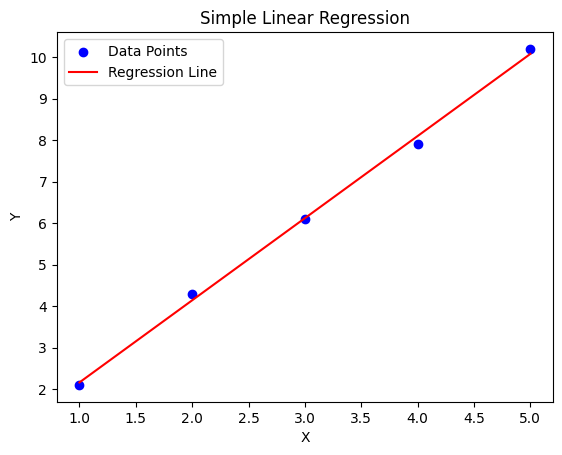

In [7]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)   # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print coefficients
print("Intercept (a):", model.intercept_)
print("Slope (b):", model.coef_[0])

# Plot data points
plt.scatter(X, Y, color="blue", label="Data Points")

# Plot regression line
plt.plot(X, Y_pred, color="red", label="Regression Line")

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [9]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.
#(Include your Python code and output in the code box below.)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data 
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
df = pd.DataFrame({
    "Area": Area,
    "Rooms": Rooms,
    "Price": Price
})

# Independent and dependent variables
X = df[["Area", "Rooms"]]
y = df["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print regression coefficients
print("Intercept:", model.intercept_)
print("Coefficients (Area, Rooms):", model.coef_)

# ----- Manual VIF calculation -----
def calculate_vif(X):
    vif_dict = {}
    for i in range(X.shape[1]):
        # Current feature
        X_i = X.iloc[:, i]
        # Other features
        X_other = X.drop(X.columns[i], axis=1)
        
        # Fit regression: Xi ~ other features
        reg = LinearRegression()
        reg.fit(X_other, X_i)
        R2 = reg.score(X_other, X_i)
        
        # VIF formula
        vif = 1 / (1 - R2)
        vif_dict[X.columns[i]] = vif
    return vif_dict

vif_values = calculate_vif(X)
print("\nVariance Inflation Factor (VIF):")
for feature, vif in vif_values.items():
    print(f"{feature}: {vif:.2f}")


Intercept: 103157.89473684214
Coefficients (Area, Rooms): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
Area: 7.74
Rooms: 7.74


Intercept: 0.06000000000002004
Coefficients: [0.   1.94 0.2 ]


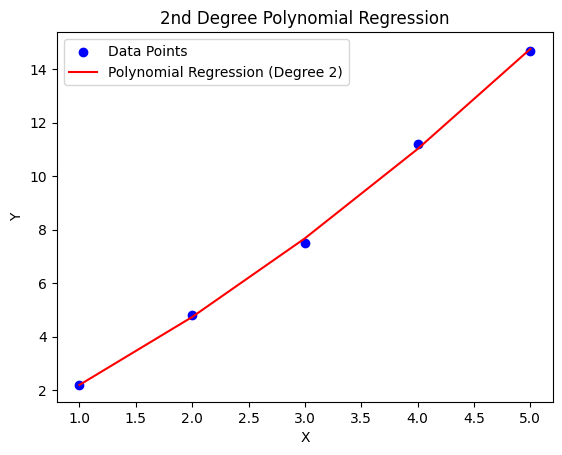

In [11]:
#Q8 Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5]
#Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.
#(Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Print model details
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot original data
plt.scatter(X, Y, color="blue", label="Data Points")

# Plot polynomial regression curve
plt.plot(X, Y_pred, color="red", label="Polynomial Regression (Degree 2)")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.legend()
plt.show()


Residuals: [-3.   5.5 -1.  -2.5  1. ]


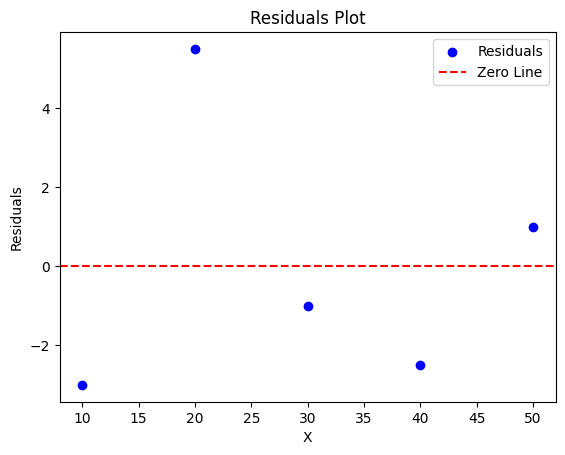

In [12]:
#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals = Actual - Predicted
residuals = Y - Y_pred

# Print residuals
print("Residuals:", residuals)

# Plot residuals
plt.scatter(X, residuals, color="blue", label="Residuals")
plt.axhline(y=0, color="red", linestyle="--", label="Zero Line")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()


In [ ]:
#Question 10: Imagine you are a data scientist working for a real estate company. You
#need to predict house prices using features like area, number of rooms, and location.
#However, you detect heteroscedasticity and multicollinearity in your regression
#model. Explain the steps you would take to address these issues and ensure a robust model


We’re building a house price prediction model using features like:

Area
Number of rooms

Location
But we face two issues:
Heteroscedasticity → residuals (errors) are not evenly spread.
Multicollinearity → independent variables (like Area and Rooms) are highly correlated.
Step 1: Fix Heteroscedasticity

Heteroscedasticity makes predictions unreliable. To handle it, we can:

Transform the target variable (Y)

Apply log, square root, or Box-Cox transformation to stabilize variance.

Example: use log(price) instead of price.

Use Weighted Least Squares (WLS)

Assign different weights to data points so errors are balanced.

Robust Regression Methods

Use models that are less sensitive to heteroscedasticity (like statsmodels.RLM).

Step 2: Fix Multicollinearity

Multicollinearity makes it hard to know which feature really matters. To handle it, we can:

Check VIF (Variance Inflation Factor)

If VIF > 10 → strong multicollinearity.

Drop or Combine Correlated Features

Example: If Area and Rooms are highly correlated, maybe keep only Area or create a new feature like Price per Room.

Feature Engineering / Dimensionality Reduction

Use PCA (Principal Component Analysis) or domain knowledge to reduce redundancy.

Regularization

Use Ridge or Lasso Regression instead of plain linear regression.

Ridge → reduces effect of correlated features (keeps all features).

Lasso → can even remove irrelevant features.

Step 3: Build a Robust Model

After addressing heteroscedasticity and multicollinearity:

Train the model again.

Validate using train/test split or cross-validation.

Evaluate with metrics like RMSE, R², Adjusted R².